## Bank Customer's Churn Classification
Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.6.0'

In [31]:
df = pd.read_csv('Churn_Modelling.csv') ## Loading the dataset
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Exploring the dataset

In [32]:
df.shape

(10000, 14)

In [33]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [34]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [35]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

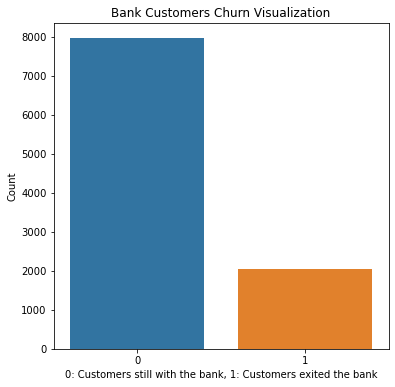

In [36]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(6,6))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [37]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Feature Engineering
Converting categorical features into numerical features using get_dummies()

In [39]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [40]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [41]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Data Preprocessing
• Split the dataset into independent features (ie: X) and label (ie: y).

• Split the dataset further into train and test sets.

• Apply feature scaling to train and test sets of independent features.

In [42]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [43]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Artificial Neural Network (ANN)

In [45]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
# Initialising the ANN
ann = tf.keras.models.Sequential()

In [47]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))


In [49]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [50]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

## Training the ANN

In [51]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
# Fitting the ANN to the Training set
model_history = ann.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 34s 50ms/step - loss: 0.5657 - accuracy: 0.7356 - val_loss: 0.4923 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 26s 48ms/step - loss: 0.4682 - accuracy: 0.7975 - val_loss: 0.4550 - val_accuracy: 0.8008
Epoch 3/100
536/536 [==============================] - 23s 43ms/step - loss: 0.4427 - accuracy: 0.8041 - val_loss: 0.4398 - val_accuracy: 0.8099
Epoch 4/100
536/536 [==============================] - 26s 49ms/step - loss: 0.4296 - accuracy: 0.8153 - val_loss: 0.4312 - val_accuracy: 0.8156
Epoch 5/100
536/536 [==============================] - 26s 48ms/step - loss: 0.4196 - accuracy: 0.8252 - val_loss: 0.4269 - val_accuracy: 0.8167
Epoch 6/100
536/536 [==============================] - 25s 47ms/step - loss: 0.4139 - accuracy: 0.8276 - val_loss: 0.4238 - val_accuracy: 0.8213
Epoch 7/100
536/536 [==============================] - 25s 47ms/step - loss: 0.4097 - accuracy: 0.8319 - val_loss: 0.4220 - val_ac

In [53]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

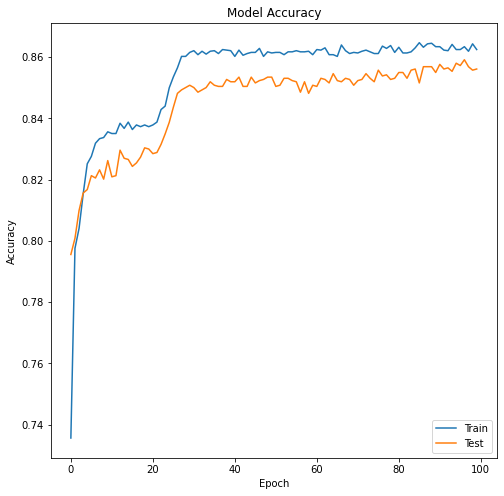

In [54]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

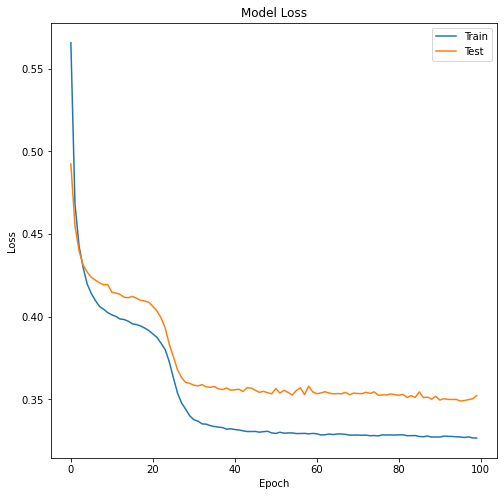

In [55]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Model Evaluation

In [57]:
# Predicting the Test set results
y_pred = ann.predict(X_test)

In [58]:
y_pred 

array([[0.2668037 ],
       [0.2903759 ],
       [0.12425819],
       ...,
       [0.2997501 ],
       [0.15947321],
       [0.26270783]], dtype=float32)

In [59]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1495,  100],
       [ 181,  224]], dtype=int64)

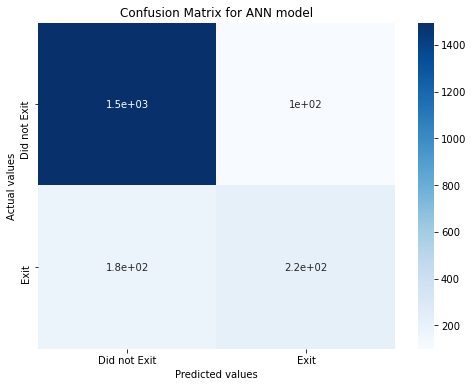

In [62]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [63]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.95%


## Making the predictions

In [66]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return ann.predict(sample_value)

In [67]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

C:\Users\selor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Low chance of exit.


In [71]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [600, 40, 3, 600000, 2, 1, 1, 50000, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

C:\Users\selor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: High chance of exit!


In [70]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 0, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

C:\Users\selor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Low chance of exit.
